# Sympy

Standardno uvezemo Sympy pod uobičajenom skraćenicom `sp`. Pozivom funkcije `init_printing` podešavamo lijep ispis matematičkih izraza unutar Jupytera (konkretno, koristeći $\LaTeX$). Ako želimo Sympy koristiti interaktivno kao "pametni kalkulator", možemo umjesto `init_printing` pozvati `init_session`, što će automatski uvesti sve (`*`) iz Sympyjevog prostora imena u tekući, i još definirati nekoliko simbola za uobičajene "varijable" (više o simbolima kasnije). No ako želimo programirati kao da je Sympy samo još jedan modul, dobro je ne pozvati `init_session`, nego ručno konstruirati simbole koji nam trebaju, i dohvaćati Sympyjeve funkcije eksplicitnim navođenjem `sp.`.

In [1]:
import sympy as sp
sp.init_printing()

## Računanje s brojevima

Evo jednostavnog primjera koji pokazuje razliku numeričkog i simboličkog računanja. $\sqrt 8$ nije izračunat na određeni broj decimala (približno), već je pojednostavljen egzaktno.

In [2]:
x = sp.sqrt(8)
x

Naravno, ako nemamo LaTeX ili želimo dalje poslati taj izraz nekome tko razumije samo nizove znakova, možemo ga jednostavno pretvoriti u string pomoću poziva `str` (ili `print` ako to odmah želimo ispisati). Također, ako želimo izraz uvrstiti u neki LaTeX-dokument, lako je dobiti kod koji moramo zalijepiti. Funkcija `pprint` također zna na razne načine vizualno reprezentirati izraze tako da budu što sličniji uobičajenoj matematičkoj notaciji.

In [10]:
print(x)
print()
print(sp.latex(x))
print()
sp.pprint(x)
sp.pprint(x, use_unicode=False)

2*sqrt(2)

2 \sqrt{2}

2⋅√2
    ___
2*\/ 2 


Interna reprezentacija takvog izraza je stablo, čiji korijen (`.func`) predstavlja vrstu izraza, a glavna podstabla (`.args`) dijelove izraza. Iz naziva tih atributa vidimo da su prvenstveno zamišljeni za modeliranje poziva funkcije (`func(args)`), ali zapravo se mogu koristiti i za razne druge stvari: operacije (`Mul(faktor1, faktor2)`), pa čak i tipove podataka (`Integer(cijeli_broj)`). Funkcija `.srepr` pretvara to stablo u string.

In [4]:
sp.srepr(x)

'Mul(Integer(2), Pow(Integer(2), Rational(1, 2)))'

In [5]:
x.func, x.args

(sympy.core.mul.Mul, (2, sqrt(2)))

Pomoću `.args` i indeksa (uglatih zagrada) možemo doći na proizvoljno mjesto u izrazu ('kretati se kroz stablo').

In [6]:
x.args[1].args[0]

Stablasta struktura Sympyjevih izraza ne prati doslovno Pythonova apstraktna sintaksna stabla. Recimo, matematički, oduzimanje nije zasebna operacija, već jednostavno zbrajanje sa suprotnim brojem --- a u prstenu s jedinicom, suprotni broj možemo dobiti množenjem s konstantom $-1$. Potpuno analogno, dijeljenje se dobije množenjem s multiplikativnim inverzom, koji se pak dobije potenciranjem eksponentom $-1$.

Na taj način, već pri pretvaranju u kanonski oblik stabla, možemo ustanoviti jednakost nekih izraza. Pythonov `==` uspoređuje izraze kao stabla i ne pokušava transformirati jedan u drugi, ali svejedno zna da je $-a+b=b-a$ jer je zbrajanje komutativno (korijen `Add` pri konstrukciji stabla odmah sortira svoju djecu).

In [7]:
y = sp.sqrt(2) - sp.sqrt(3)
y

In [8]:
sp.srepr(y)

'Add(Mul(Integer(-1), Pow(Integer(3), Rational(1, 2))), Pow(Integer(2), Rational(1, 2)))'

In [9]:
-sp.sqrt(3) + sp.sqrt(2) == y

True

Naravno, glavna prednost simboličkog računanja je u tome što nemamo grešaka aproksimacije: $x^2$ je točno $8$. Ipak, ponekad bismo htjeli neki broj (najčešće konačni rezultat) numerički aproksimirati, odnosno izračunati na zadani broj decimala. Tome služi metoda `.n`.

In [10]:
x**2 == 8

True

In [11]:
x.n(50)

## Simboli

Egzaktnim računanjem s brojevima već možemo mnogo toga, ali puna snaga Sympyja dolazi od baratanja *simbolima*, koji predstavljaju matematičke varijable. Običaj je da se simbolu $t$ (koji je objekt) dade ime, najčešće globalno, `t` u Pythonu. Tako možemo kasnije jednostavno referirati na njih u izrazima. Jednu ili više takvih asocijacija možemo stvoriti pozivom funkcije `symbols`, a jednoslovne simbole (latinične ili grčke) možemo i uvesti iz modula `sympy.abc`.

Pri pozivu `symbols` sami biramo kako će se objekt zvati (možemo birati ime koje je lakše tipkati za Python, a ime koje ljepše izgleda u formulama za Sympy). To možemo i u slučaju uvoza iz `sympy.abc`, korištenjem `as`. No običaj je da se imena koriste u što sličnijem obliku (napomena: $\lambda$ se zove `sympy.abc.lamda`, jer je `lambda` ključna riječ u Pythonu), da ne moramo puno toga pamtiti.

*Napomena:* u `sp.abc` postoje i simboli `i`, `pi` i `e`, ali bez semantike kakvu u matematici obično vezujemo uz te simbole. Treba biti oprezan da ne pobrkamo `sp.abc.i` i `sp.I` (imaginarna jedinica), `sp.abc.e` i `sp.E` (baza prirodnog logaritma), te `sp.abc.pi` i `sp.pi` (površina jediničnog kruga).

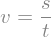

In [12]:
brzina, put, vrijeme = sp.symbols('v, s, t')
izraz = sp.Eq(brzina, put / vrijeme)
izraz

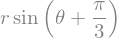

In [13]:
from sympy.abc import r, theta
polarno = r * sp.sin(theta + sp.pi/3)
polarno

In [14]:
sp.srepr(izraz)

"Equality(Symbol('v'), Mul(Symbol('s'), Pow(Symbol('t'), Integer(-1))))"

In [15]:
izraz.args[1].args[1].args[0].func

sympy.core.symbol.Symbol

### Supstiticije

Pomoću metode `.subs` možemo simbole (ili podizraze, ali vidjeli smo da što su Sympyju podizrazi ne mora biti baš intuitivno) u izrazu zamjenjivati nekim drugim izrazima.

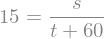

In [16]:
izraz.subs({brzina: 15, vrijeme: vrijeme+60})

In [17]:
x, y, z = sp.symbols('x, y, z')
(x**6 + 2*x**5 - x**4 - 4*x**3 + 4*x**2 - 2*x + 3).subs({x**3: z**3, x**2: y**2})

Uzastopnim supstitucijama uz LaTeXov *rendering engine* možemo čak dobiti i [lijepe slike](https://en.wikipedia.org/wiki/Iterated_function_system).

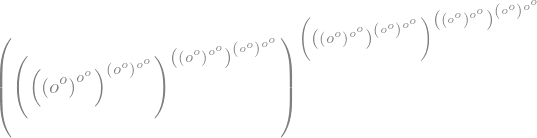

In [18]:
from sympy.abc import o
fraktal = o
for korak in range(5): fraktal = fraktal.subs(o, o**o)
fraktal

Ako želimo aproksimirati vrijednost izraza na određeni broj decimala, puno je bolje (brže, a često i točnije) dati argument `subs` metodi `.n` nego pozivati prvo `.subs` pa `.n` zasebno.

In [19]:
polarno.n(50, subs={r: 5, theta: sp.pi/4})

## Analiza

Na izrazima možemo primjenjivati razne operatore: deriviranja, integriranja, sumiranja, limesa, ...

Svi takvi komplicirani operatori imaju metodu `.doit` koja zapravo provodi simbolički račun -- sâm poziv operatora samo konstruira simbolički izraz (koji možemo ispisati da bismo vidjeli da je Sympy ispravno shvatio što hoćemo).

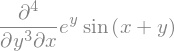

In [20]:
from sympy.abc import x, y
der_zadatak = sp.Derivative(sp.sin(x+y) * sp.E**y, x, y, 3)
der_zadatak

In [21]:
der_rješenje = der_zadatak.doit()
der_rješenje

\iiiint - 2 \left(\sin{\left(x + y \right)} + \cos{\left(x + y \right)}\right) e^{y}\, dy\, dy\, dy\, dx


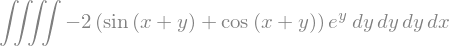

In [22]:
integral_zadatak = sp.Integral(der_rješenje, y, y, y, x)
print(sp.latex(integral_zadatak))
integral_zadatak

In [23]:
%time integral_zadatak.doit()

CPU times: user 1.9 s, sys: 14.7 ms, total: 1.91 s
Wall time: 1.91 s


Sympy zna svašta integirati simbolički, možda i neke integrale koje vi (niti ja) ne znate.

Određeni integrali se pišu kao `Integral(`izraz`, (`varijabla`, `od`, `do`))`.
`sp.oo` je oznaka za plus beskonačno.

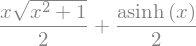

In [24]:
sp.Integral(sp.sqrt(x**2 + 1)).doit()

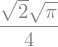

In [25]:
sp.Integral(sp.sin(x**2), (x, 0, sp.oo)).doit()

Evo i nekoliko limesa. Vidimo da Sympy zna mnoge limese iz Matematičke analize (zapravo zna L'Hôpitalovo pravilo, pa pomoću njega računa). Kao opcionalni zadnji argument u `sp.Limit` možemo navesti smjer iz kojeg se limes računa (može biti `'+'` za limes zdesna, `'-'` za limes slijeva, ili `'+-'` za obostrane limese -- no podrazumijevana vrijednost je `'+'` pa morate specificirati ako želite obostrani limes).

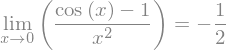

In [26]:
limes = sp.Limit((sp.cos(x) - 1) / x**2, x, 0, '+-')
sp.Eq(limes, limes.doit())

Sympy zna da eksponencijalna funkcija raste brže od potencije.

In [27]:
from sympy.abc import n
sp.Limit(sp.E**x / x**n, x, sp.oo).doit()

### Redovi

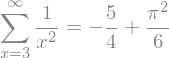

In [28]:
red = sp.Sum(x**-2, (x, 3, sp.oo))
sp.Eq(red, red.doit())

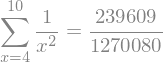

In [29]:
suma = sp.Sum(x**-2, (x, 4, 10))
sp.Eq(suma, suma.doit())

Metodom `.series` možemo izraz razviti u red do nekog člana (eksponenta). Možemo navesti varijablu $x$ po kojoj razvijamo, točku $\alpha$ oko koje razvijamo, eksponent $n$ do kojeg razvijamo, i smjer (`'+'` ili `'-'`). Povratna vrijednost u sebi uključuje i član s ocjenom greške $O((x-\alpha)^n)$ --- ako ga želimo maknuti, pozovemo metodu `removeO()`.

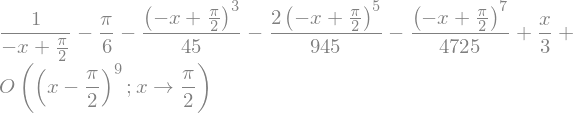

In [30]:
razvoj = sp.tan(x).series(x, sp.pi/2, 9, '-')
razvoj

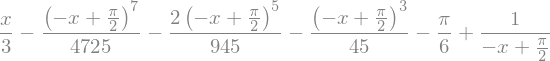

In [31]:
razvoj.removeO()

### Inhibiranje evaluacije

Rekli smo, ako imamo neki komplicirani zadatak, Sympy nam ga neće odmah riješiti, nego samo konstruirati simboličku reprezentaciju (koju onda doista evaluiramo s `.doit()`). Tako možemo dobiti pregledne jednadžbe oblika *zadatak*$=$*rješenje* što smo gore koristili. No što ako se radi o jednostavnom zadatku koji bi Sympy automatski riješio? Uvijek možemo ručno konstruirati izraz (pogledajte `srepr` da biste vidjeli kako ga točno konstruirati) s imenovanim argumentom `evaluate=False`). *Pazite,* ako želite takav izraz koristiti u većim izrazima, potrebno je i njima staviti `evaluate=False` jer će se inače početni izraz ipak izračunati.

In [32]:
čvor = sp.Add(1, 1, evaluate=False)
sp.Eq(čvor, čvor.doit(), evaluate=False)

## Rješavanje jednadžbi

Vidjeli smo da jednadžbe možemo konstruirati kao `sp.Eq(`lijevo`, `desno`)`.
Pogledajmo sada kako ih možemo rješavati. Napomena: Sympy rješava jednadžbe u polju $\mathbb C$, jer je ono algebarski zatvoreno.

In [33]:
jednadžba = sp.Eq(x**3 + 8, 0)
jednadžba

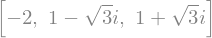

In [34]:
sp.solve(jednadžba)

Podrazumijevano dobijemo samo listu rješenja. [Možemo navesti nepoznanicu kao drugi argument od `solve`, ali ako je samo jedan nenumerički simbol u jednadžbi (kao `x` gore), Sympy će automatski pretpostaviti da je to nepoznanica.] Imenovanim argumentom `dict` možemo dobiti rješenja kao rječnike, koji preslikavaju simbole u njihove vrijednosti.

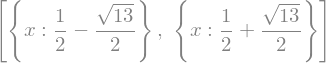

In [35]:
sp.solve(sp.Eq(x**2, x+3), x, dict=True)

Vidimo da nam funkcija `solve` vraća listu rješenja. Možemo zadati i listu jednadžbi (i listu nepoznanica), čime rješavamo sustave. Ako nepoznanica ima više, dobit ćemo parove ili općenito n-torke (ili rječnike uz `dict=True`).

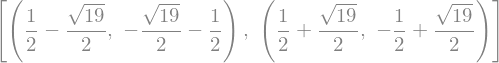

In [36]:
sp.solve([sp.Eq(x**2 + y**2, 10), sp.Eq(x - y, 1)], [x, y])

Veliki nedostatak funkcije `solve` je što zna riješiti samo jednadžbe s konačno mnogo rješenja (nema uopće način da prikaže beskonačne skupove rješenja). O drugačijem, skupovnom pristupu rješavanju jednadžbi više ćemo reći kasnije.

### Diferencijalne jednadžbe

Da bismo rješavali diferencijalne jednadžbe, prvo nam trebaju 'funkcijski simboli': simboli za nepoznate funkcije. Njih također možemo konstruirati sa `symbols`, uz imenovani argument `cls=sp.Function`.

Napravimo jedan funkcijski simbol (zavisnu varijablu) $y$.

Napomena: Sympy ne podržava uobičajenu konvenciju u diferencijalnim jednadžbama, da se nezavisna varijabla ispušta kao argument. Uvijek u jednadžbama moramo pisati $y(x)$, ne $y$.

In [37]:
y = sp.symbols('y', cls=sp.Function)
type(y)

sympy.core.function.UndefinedFunction

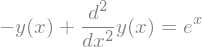

In [38]:
difj = sp.Eq(sp.Derivative(y(x), x, 2) - y(x), sp.E ** x)
difj

Pomoću funkcije `classify_ode` možemo vidjeti kako Sympy gleda na našu jednadžbu, i kako je planira riješiti. Tipovi odnosno metode su poredani redom kojim ih Sympy planira upotrijebiti. Dobro dođe za debugiranje.

Ako smo uvjereni da Sympy zna riješiti jednadžbu, možemo samo pozvati funkciju `dsolve`.

nth_linear_constant_coeff_undetermined_coefficients
nth_linear_constant_coeff_variation_of_parameters
nth_linear_constant_coeff_variation_of_parameters_Integral


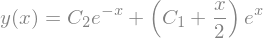

In [39]:
print(*sp.classify_ode(difj, y(x)), sep='\n')
sp.dsolve(difj, y(x))

## Linearna algebra

Pozivom klase `Matrix` možemo konstruirati matrice. One se ne ponašaju kao Numpyjevi arrayi, nego kao matematičke matrice --- npr. množe se normalno operatorom `*`, i invertiraju s `**-1`. Mnoge notacije (funkcija `zeros` za nulmatricu, svojstvo `.T` za transponiranu matricu, konstrukcija iz liste) su iste kao u Numpyju, samo s naglaskom na egzaktne rezultate.

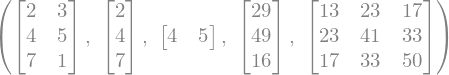

In [40]:
M = sp.Matrix([[2, 3], [4, 5], [7, 1]])

M, M.col(0), M.row(1), M*sp.Matrix([1, 9]), M*M.T

Jedinična matrica se dobije funkcijom `eye`. Nema broadcasta broja prema matrici za zbrajanje (za množenje ima, jer je tako definirano množenje matrice skalarom) --- umjesto `6+M` trebamo `6` pomnožiti s pozivom funkcije `ones`. 

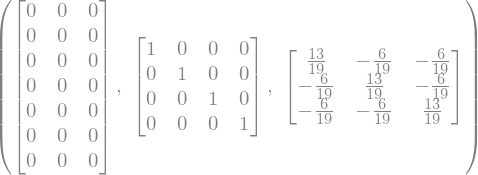

In [41]:
sp.zeros(7, 3), sp.eye(4), (6*sp.ones(3, 3) + sp.eye(3)) ** -1

Determinante spadaju u komplicirane zadatke koje Sympy neće automatski izvršiti (kao i derivacije, integrali, ...).

In [42]:
sp.Determinant(sp.Matrix([[1,2,3], [4,5,6], [1,3,4]])**-1).doit()

Metodom `.eigenvects()` dobivamo rješenje svojstvenog problema: listu trojki (svojstvena vrijednost, njena algebarska kratnost u karakterističnom polinomu, lista svojstvenih vektora koji razapinju svojstveni potprostor).

* svojstvena vrijednost 1 algebarske kratnosti 1 i geometrijske kratnosti 1
* svojstvena vrijednost 2 algebarske kratnosti 1 i geometrijske kratnosti 1
* svojstvena vrijednost 4 algebarske kratnosti 2 i geometrijske kratnosti 1


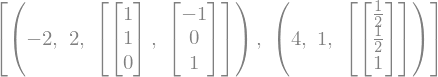

In [43]:
M4 = sp.Matrix([[ 5, 4, 2, 1], 
               [ 0, 1,-1,-1], 
               [-1,-1, 3, 0], 
               [ 1, 1,-1, 2]])

for λ, kratnost, baza in M4.eigenvects():
    print('* svojstvena vrijednost', λ, 'algebarske kratnosti', 
          kratnost, 'i geometrijske kratnosti', len(baza))
    
sp.Matrix([[1, -3, 3],
           [3, -5, 3],
           [6, -6, 4]]).eigenvects()

Metoda `.rref()` provodi Gauss-Jordanove transformacije. Vraća do kraja reduciranu matricu i indekse pivotnih elemenata.

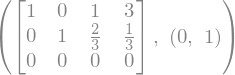

In [44]:
sp.Matrix([[ 1, 0, 1, 3], 
           [ 2, 3, 4, 7], 
           [-1,-3,-3,-4]]).rref()

## Razne manipulacije izrazima

### Funkcija `S`

Python s cijelim brojevima obično računa egzaktno, pa nije bitno računamo li npr. `32**78` s Pythonovim ili Sympyjevim cijelim brojevima. Izuzetak je dijeljenje: u Pythonu vraća `float`, a u Sympyju vraća razlomak. Ako želimo egzaktno računati, moramo uložiti barem jedan operand u Sympy pomoću funkcije `S`.

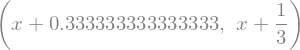

In [45]:
x + 1 / 3, x + sp.S(1) / 3

`S` je zapravo konstruktor Sympyjevih izraza koji može parsirati stringove u "prirodnoj" matematičkoj notaciji. Ipak, ta notacija može biti neprecizna (a i ne radi za neke uobičajene zapise kao `'2x'`) --- ako želimo robusno rješenje, bolje je konstruirati izraze u Sympyju direktno.

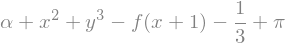

In [46]:
sp.S('x^2+y^3-1/3+pi+alpha-f(x+1)')

`S` ima i mnoge atribute koji označavaju često korištene objekte (najčešće brojeve i skupove). Implementirani su kao singletoni, da ih Sympy ne bi trebao uvijek iznova konstruirati (recimo vidjeli smo da se $-1$ pojavljuje pri svakom oduzimanju i dijeljenju).

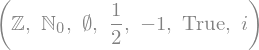

In [47]:
sp.S.Integers, sp.S.Naturals0, sp.S.EmptySet, sp.S.Half, sp.S.NegativeOne, sp.S.true, sp.S.ImaginaryUnit

### Vizualizacija stabala izrazâ

Nažalost, Sympy ne zna sâm proizvesti grafički zapis stabala svojih izraza. Ali zna proizvesti zapis u formatu DOT, koji se korištenjem alata Graphviz može prebaciti u razne grafičke formate (npr. SVG, koji Jupyter zna prikazati). To može biti korisno ako želite vidjeti kako Sympy zamišlja pojedine vrste izraza (npr. za debugiranje).

Ne morate imati instaliran Graphviz da biste koristili tu mogućnost: samo kopirajte donji *output* lijevo u https://dreampuf.github.io/GraphvizOnline/, pričekajte koju sekundu da se renderira desno, i klikom na crtež skinite SVG.

In [48]:
from sympy.printing.dot import dotprint
from sympy.abc import a, b, c, x
print(dotprint(sp.solve(a * x**2 + b * x + c, x)[~0]))

digraph{

# Graph style
"ordering"="out"
"rankdir"="TD"

#########
# Nodes #
#########

"Mul(Rational(-1, 2), Pow(Symbol('a'), Integer(-1)), Add(Symbol('b'), Pow(Add(Pow(Symbol('b'), Integer(2)), Mul(Integer(-4), Symbol('a'), Symbol('c'))), Rational(1, 2))))_()" ["color"="black", "label"="Mul", "shape"="ellipse"];
"Rational(-1, 2)_(0,)" ["color"="black", "label"="-1/2", "shape"="ellipse"];
"Pow(Symbol('a'), Integer(-1))_(1,)" ["color"="black", "label"="Pow", "shape"="ellipse"];
"Symbol('a')_(1, 0)" ["color"="black", "label"="a", "shape"="ellipse"];
"Integer(-1)_(1, 1)" ["color"="black", "label"="-1", "shape"="ellipse"];
"Add(Symbol('b'), Pow(Add(Pow(Symbol('b'), Integer(2)), Mul(Integer(-4), Symbol('a'), Symbol('c'))), Rational(1, 2)))_(2,)" ["color"="black", "label"="Add", "shape"="ellipse"];
"Symbol('b')_(2, 0)" ["color"="black", "label"="b", "shape"="ellipse"];
"Pow(Add(Pow(Symbol('b'), Integer(2)), Mul(Integer(-4), Symbol('a'), Symbol('c'))), Rational(1, 2))_(2, 1)" ["color"="black

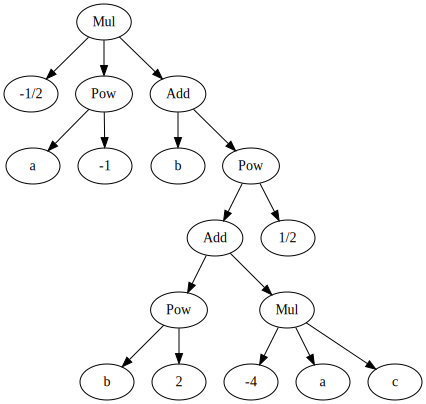

In [49]:
from IPython.display import SVG
SVG('rješenja_kvadratne.svg')

## Transformacije izraza

Metodom `.rewrite` možemo reći izrazu da se pokuša zapisati u terminima neke druge funkcije (ako ne može, izraz će ostati nepromijenjen). Često je korisno u granama matematike gdje iz povijesnih razloga ima puno načina za zapisati jednu te istu stvar: npr. u trigonometriji.

Evo kosinusa zapisanog pomoću sinusa, tangensa, kosekansa, eksponencijalne funkcije, i arkus kosinusa (ovo zadnje nije uspjelo, vjerojatno jer Sympy ne zna općenite inverze funkcija).

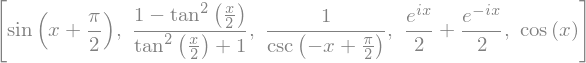

In [50]:
[sp.cos(x).rewrite(funkcija)
 for funkcija in (sp.sin, sp.tan, sp.csc, sp.exp, sp.acos)]

Metoda `.equals` pokušava raznim (uglavnom polinomnim) transformacijama ustanoviti jesu li dva izraza jednaki.

In [51]:
(x**2 + 2*x + 1).equals((x+1)**2), \
sp.sin(2*x).equals(2*sp.sin(x)*sp.cos(x)), \
sp.sqrt(x**2).equals(x)

(True, True, None)

Metoda `.simplify()` pokušava sličnim transformacijama dovesti izraz u što jednostavniji oblik. Heuristika jednostavnosti joj nije previše pametna --- često je bolje koristiti specijalizirane funkcije ako znamo što želimo napraviti. No dobra je za "preprocessing" raznih kobasicâ koje možemo dobiti kao međurezultate.

In [52]:
(sp.gamma(x + 2) / sp.gamma(x)).simplify()

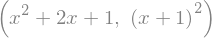

In [53]:
(x ** 2 + 2 * x + 1).simplify(), (x ** 2 + 2 * x + 1).factor()

Ponekad je korisno transformaciju primijeniti samo na neki dio izraza. Evo pomoćne funkcije koja to radi.

In [54]:
def partrans(izraz, transformacija, podizraz):
    return izraz.subs(podizraz, transformacija(podizraz))

Recimo, `expand_trig` raspisuje trigonometrijske funkcije višestrukog kuta. Ako je primijenimo na donji izraz, raspisat će i sinus i kosinus dvostrukog kuta. Ako želimo raspisati samo jedan od njih, to možemo pomoću funkcije `partrans`.

In [55]:
izraz = sp.sin(2*x) + sp.cos(2*x)
sp.expand_trig(izraz), partrans(izraz, sp.expand_trig, sp.sin(2*x))

### Polinomne transformacije

Metoda `.expand()` primjenjuje distributivnost (množi "svaki sa svakim") dok ne dobije sumu monoma.

In [56]:
((x + 1) * (x - 2) - (x + 3) * (x - 1)).expand()

Metoda `.factor()` djeluje u suprotnom smjeru: izlučuje što može i kombinira izraze da dobije produkt što manjih izraza.

In [57]:
from sympy.abc import x,y,z
(x**2*z + 4*x*y*z + 4*y**2*z).factor()

Primijetimo da `.factor()` djeluje algebarski: nije ga briga za ostale veze između pribrojnika. Ovdje nije prepoznao $\sin^2+\cos^2$, ali jest prepoznao kvadrat zbroja.

In [58]:
trinom = sp.cos(x)**2 + sp.sin(x)**2 - 2*sp.sin(x)*sp.cos(x)
sp.Eq(trinom, trinom.factor())

Metodom `.coeff` možemo izvaditi koeficijent uz danu potenciju dane varijable. Precizno, `t.coeff(x, n)` je koeficijent uz $x^n$ u polinomu $t$.

In [59]:
(x*y + x - 3 + 2*x**2 - z*x**2 + x**3).coeff(x, 2)

Evo nekoliko metoda, primijetimo da sve daju različite izraze. `.together()` je svođenje na zajednički (faktorizirani) nazivnik, `.apart()` je "suprotno" od toga (rastav na parcijalne razlomke). `.cancel()` skraćuje razlomke bez faktorizacije (traži NZM Euklidovim algoritmom, zato je brži nego da faktorizira i brojnik i nazivnik --- pogledajte primjer dolje). `.factor()` i `.expand()` djeluju na brojniku i na nazivniku zasebno.

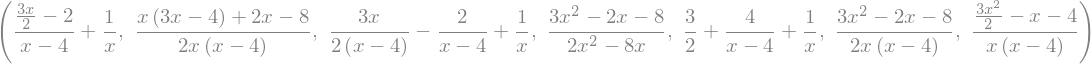

In [60]:
izraz = 1 / x + (3*x/2 - 2) / (x - 4)
izraz, izraz.together(), izraz.expand(), izraz.cancel(), izraz.apart(), \
izraz.together().expand().together(), izraz.simplify()

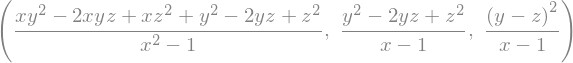

In [61]:
izraz = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2) / (x**2 - 1)
izraz, izraz.cancel(), izraz.factor()

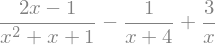

In [62]:
((4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)).apart()

### Trigonometrijske transformacije

Arkus kosinus nije inverzna funkcija kosinusa.

In [63]:
print(sp.acos(sp.cos(7)).equals(7))

sp.acos(sp.cos(7)).simplify()

False


Funkcije `trigsimp` i `expand_trig` služe redukciji i ekspanziji trigonometrijskih (i hiperbolnih) izraza. Primjerice, `expand_trig` primjenjuje adicijske formule u smjeru više jednostavnijih poziva, a `trigsimp` prema manje složenijih poziva trigonometrijskih funkcija.

In [64]:
sp.trigsimp(sp.sinh(x)**4 - sp.cosh(x)**4)

In [65]:
sp.expand_trig(sp.cos(1 - x))

### Eksponencijalne i potencijske transformacije

Mnoga srednjoškolska pravila vezana uz potenciranje zapravo nisu validna za općenite (kompleksne) varijable. Neka su validna za realne varijable, a neka samo za pozitivne/nenegativne. Varijable koje uvezemo iz `sympy.abc` su općenite, ali onima koje definiramo sa `symbols` možemo propisivati svojstva. Uvedimo dvije baze i dva eksponenta, općenite (bez sufiksa), realne (sa sufiksom `r`) i nenegativne (sa sufiksom `n`).

In [66]:
from sympy.abc import a, b, x, y
ar, br, xr, yr = sp.symbols('a b x y', real=True)
an, bn, xn, yn = sp.symbols('a b x y', nonnegative=True)
ap, bp, xp, yp = sp.symbols('a b x y', positive=True)

Prvo pravilo ($x^ax^b=x^{a+b}$) je sasvim univerzalno. Pravilo $x^a\cdot y^a=(xy)^a$ vrijedi puno rjeđe, ali vrijedi npr. kad su $x$ i $y$ prirodni brojevi.

In [67]:
sp.powsimp(x**a * x**b), sp.powsimp(2**a * 3**a)

Još jedan važan slučaj gdje vrijedi je s nenegativnim bazama i realnim eksponentima. Ako nam se (kao u srednjoškolskim udžbenicima) ne dâ previše razmišljati o uvjetima, možemo forsirati primjenu pravila imenovanim argumentom `force`.

In [68]:
sp.powsimp(xn**ar * yn**ar), sp.powsimp(x**a * y**a, force=True)

No ako je eksponent prirodni broj, pravilo ne radi iz drugog razloga: $(xy)^n$ se automatski natrag raspisuje kao $x^ny^n$ (baš kao što se s operacijama niže razine, $n(x+y)$ automatski distribuira).

In [69]:
sp.powsimp(x**2 * y**2), (x*y)**2, 2*(x+y)

U suprotnom smjeru od `powsimp` sada imamo dvije funkcije, za bazu i za eksponent. Opet, ova druga radi uvijek, a prva samo za nenegativne baze i realni eksponent. (Ako nekom ide kompleksna analiza, neka smisli kontraprimjere!:)

In [70]:
sp.expand_power_exp(x ** (a+b)), sp.expand_power_base((xn*yn) ** ar)

Zapravo imamo još jednu, za pojednostavljivanje ugniježđenog potenciranja. To je ona formula $(x^a)^b=x^{ab}$, koja ne vrijedi uvijek. Vrijedi za nenegativnu bazu i realne eksponente, ili za bilo kakvu potenciju i cjelobrojni vanjski eksponent.

In [71]:
sp.powdenest((xn**ar)**br), sp.powdenest((x**a)**sp.symbols('b', integer=True))

Logaritmi imaju više-manje iste transformacije, samo gledane s druge strane (i argumenti sada moraju biti pozitivni, ne samo nenegativni). Funkcije za ekspanziju i redukciju su `expand_log` i `logcombine`.

Naravno, od donja dva izraza, samo je jedan jednak $x$ za sasvim općenite $x$. Drugi je jednak $x$ za _realne_ $x$.

In [72]:
sp.exp(sp.log(x)), sp.log(sp.exp(x)), sp.log(sp.exp(xr))

In [73]:
sp.expand_log(sp.log(xp * yp)), sp.expand_log(sp.log(xp ** ar))

In [74]:
sp.logcombine(2 * sp.log(xp))

### Kombinatoričke transformacije

In [75]:
sp.Eq(sp.factorial(x), sp.gamma(x + 1))

In [76]:
_.simplify()

Ako Sympy ne zna izračunati integral, ostavit će ga u neevaluiranom obliku (`.doit()` ga neće promijeniti). Ako ga zna izračunati pod određenim uvjetima, rastavit će ga na slučajeve gdje će slučaj "inače" biti neevaluirani integral. (ℜ označava realni dio kompleksnog broja.)

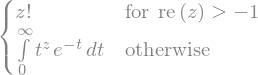

In [77]:
from sympy.abc import t
sp.Integral(t**z * sp.E**-t, (t, 0, sp.oo)).doit().rewrite(sp.factorial)

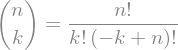

In [78]:
from sympy.abc import n, k
binkoef = sp.binomial(n, k)
sp.Eq(binkoef, binkoef.rewrite(sp.factorial))

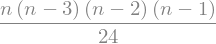

In [79]:
sp.combsimp(sp.binomial(n, n-4))

Ovu formulu vjerojatno niste znali (ja nisam!):

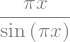

In [80]:
sp.combsimp(sp.factorial(x) * sp.factorial(-x))

## Još neke sitnice

### Skupovno rješavanje (ne)jednadžbi

Relativno novo sučelje Sympyja za rješavanje jednadžbi je funkcija `solveset`, koja prikazuje skupove rješenja preko parametara iz matematičkih skupova, čime omogućuje vjerno rješavanje jednadžbi koje imaju beskonačno mnogo rješenja. Može rješavati i nejednadžbe, ali tu još ima dosta bugova pa nemojte slijepo vjerovati onom što kaže.

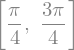

In [81]:
sp.solve(sp.cos(2*x), x)

Vidimo da je `solve` našla samo "glavna" rješenja (ona koja odgovaraju jednom periodu kosinusa). Sa `solveset` možemo dobiti čitav skup rješenja.

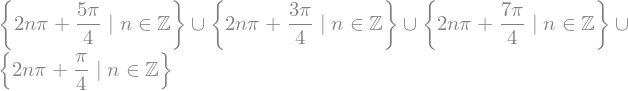

In [82]:
sp.solveset(sp.cos(2*x), x)

Kao i `solve`, `solveset` podrazumijevano rješava jednadžbe u kompleksnoj ravnini, što može dovesti do toga da dobijemo više rješenjâ nego što smo očekivali. Specificirati područje nad kojim se jednadžba rješava možemo navodeći treći argument.

In [83]:
sp.solveset(sp.Eq(sp.E**x, 1), x)

In [84]:
sp.solveset(sp.Eq(sp.E**x, 1), x, sp.S.Reals)

`solveset` promatra samo generička rješenja. Za opći $y$, jednadžba $x-y=x+y+2$ nema rješenja, iako ima rješenja za $y=-1$. Nažalost, `solveset` još ne zna rješavati jednadžbe (i sustave) po više varijabli.

In [85]:
sp.solveset(sp.Eq(x - y, x + y + 2), x)

Nejednadžbe... mogu se pojaviti i u procesu rješenja jednadžbi, recimo s apsolutnim vrijednostima.

In [86]:
sp.solveset((x**2 + 2*x - 3) / (x+7) >= 0, x, sp.S.Reals)

In [87]:
sp.solveset(sp.Eq(abs(x), y), x, sp.S.Reals)

In [88]:
krivo_rješenje = sp.solveset(sp.sin(x) <= 0, x, sp.S.Reals)
krivo_rješenje

In [89]:
3*sp.pi in krivo_rješenje, sp.sin(3*sp.pi) <= 0

(False, True)

In [90]:
sp.srepr(krivo_rješenje)

'Union(FiniteSet(Integer(0)), Interval(pi, Mul(Integer(2), pi), false, false))'

### Pretpostavke i upiti

Još jedan relativno novi dio Sympyja je sučelje pomoću kojeg se mogu određivati svojstva brojeva koje izrazi predstavljaju, neovisno o vrijednostima varijabli koje se u njima pojavljuju. Funkcija `ask` prima upit oblika `Q.`svojstvo`(`izraz`)`, i vraća `True` ako je sigurna da svojstvo vrijedi, `False` ako je sigurna da svojstvo ne vrijedi, a `None` (ne ispisuje se ništa u Jupyteru) ako nije sigurna. Naravno, još uvijek je u izradi i nije joj uvijek za vjerovati, ali već zasad zna neke prilično *cool* stvari.

In [91]:
x = sp.symbols('x', nonnegative=True)
sp.ask(sp.Q.negative(sp.sqrt(x)))

False

Vidimo da se pretpostavke mogu pisati vezane na same simbole. Ako imamo privremene pretpostavke (samo za pojedino pitanje), dobro je koristiti kontekst `with assuming`.

In [92]:
with sp.assuming(sp.Q.real(x), sp.Q.nonzero(x)):
    print(sp.ask(sp.Q.positive(x ** 2)))

True


In [93]:
x = sp.symbols('x')
with sp.assuming(sp.Q.integer(x)):
    print(sp.ask(sp.Q.prime(4 * x)))

False


### Simboličko potenciranje matrice

Za kraj pogledajmo nešto što sigurno ne bismo olovkom i papirom uspjeli izračunati: opću formulu za $n$-tu potenciju matrice tipa $3×3$. Iako je postupak sasvim jasan (Jordanova forma i Cardanova formula), sâm račun je sigurno prekompliciran za ljude. Sympy ga provede u par sekundi.

Prvo učinimo matricu `M` kvadratnom. (Tako ćemo joj umjetno povećati rang, pa neće imati inverz -- zato moramo pretpostaviti pozitivnost eksponenta.)

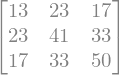

In [94]:
M *= M.T
M

CPU times: user 1.81 s, sys: 6.59 ms, total: 1.82 s
Wall time: 1.82 s


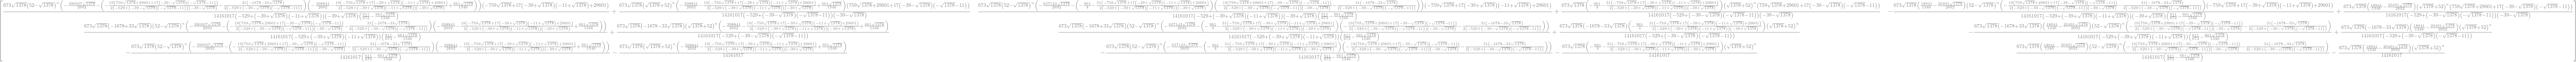

In [95]:
%%time
n = sp.symbols('n', positive=True)
kobasica = M ** n
kobasica

Za provjeru uvrstimo neki konkretni $n$ i usporedimo to s direktno izračunatom potencijom.

CPU times: user 6.96 s, sys: 12.6 ms, total: 6.97 s
Wall time: 6.97 s


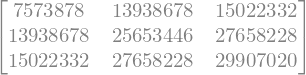

In [96]:
%time sp.simplify(kobasica.subs({n: 4}))

In [97]:
_ == M**4

True

## Literatura

[Sympy tutorial](https://docs.sympy.org/latest/tutorial/index.html)